In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics, preprocessing
from scipy.stats import itemfreq

In [6]:
os.chdir(r"C:\Users\bit\Desktop\머신러닝 알고리즘과 응용 2\data")

In [8]:
# df = pd.read_csv('data_spam.csv', header='infer',encoding='ISO-8859-1')
df = pd.read_csv('data_activity_training.csv', header='infer',encoding='latin1')

D:\Users\bit\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (11,14,19,22,25,70,73,86,87,89,90,94,97,100) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
df.shape

(19622, 160)

In [10]:
df.head(5)

,Unnamed: 0,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,1,carlitos,1323084231,788290,05/12/2011 11:23,no,11,1.41,8.07,-94.4,...,0.03,0.00,-0.02,192,203,-215,-17,654.0,476.0,A
1,2,carlitos,1323084231,808298,05/12/2011 11:23,no,11,1.41,8.07,-94.4,...,0.02,0.00,-0.02,192,203,-216,-18,661.0,473.0,A
2,3,carlitos,1323084231,820366,05/12/2011 11:23,no,11,1.42,8.07,-94.4,...,0.03,-0.02,0.00,196,204,-213,-18,658.0,469.0,A
3,4,carlitos,1323084232,120339,05/12/2011 11:23,no,12,1.48,8.05,-94.4,...,0.02,-0.02,0.00,189,206,-214,-16,658.0,469.0,A
4,5,carlitos,1323084232,196328,05/12/2011 11:23,no,12,1.48,8.07,-94.4,...,0.02,0.00,-0.02,189,206,-214,-17,655.0,473.0,A


In [28]:

isnotZero = np.array(pd.isnull(df).mean(axis=0) < 0.97)
df = df.loc[:, isnotZero]

In [29]:
(df.isnull()).sum(axis=0)
(df.isnull()).mean(axis=0)


Unnamed: 0              0.0
user_name               0.0
raw_timestamp_part_1    0.0
raw_timestamp_part_2    0.0
cvtd_timestamp          0.0
new_window              0.0
num_window              0.0
roll_belt               0.0
pitch_belt              0.0
yaw_belt                0.0
total_accel_belt        0.0
gyros_belt_x            0.0
gyros_belt_y            0.0
gyros_belt_z            0.0
accel_belt_x            0.0
accel_belt_y            0.0
accel_belt_z            0.0
magnet_belt_x           0.0
magnet_belt_y           0.0
magnet_belt_z           0.0
roll_arm                0.0
pitch_arm               0.0
yaw_arm                 0.0
total_accel_arm         0.0
gyros_arm_x             0.0
gyros_arm_y             0.0
gyros_arm_z             0.0
accel_arm_x             0.0
accel_arm_y             0.0
accel_arm_z             0.0
magnet_arm_x            0.0
magnet_arm_y            0.0
magnet_arm_z            0.0
roll_dumbbell           0.0
pitch_dumbbell          0.0
yaw_dumbbell        

In [30]:
df.shape

(19622, 60)

In [31]:
df.columns	

Index(['Unnamed: 0', 'user_name', 'raw_timestamp_part_1',
       'raw_timestamp_part_2', 'cvtd_timestamp', 'new_window', 'num_window',
       'roll_belt', 'pitch_belt', 'yaw_belt', 'total_accel_belt',
       'gyros_belt_x', 'gyros_belt_y', 'gyros_belt_z', 'accel_belt_x',
       'accel_belt_y', 'accel_belt_z', 'magnet_belt_x', 'magnet_belt_y',
       'magnet_belt_z', 'roll_arm', 'pitch_arm', 'yaw_arm', 'total_accel_arm',
       'gyros_arm_x', 'gyros_arm_y', 'gyros_arm_z', 'accel_arm_x',
       'accel_arm_y', 'accel_arm_z', 'magnet_arm_x', 'magnet_arm_y',
       'magnet_arm_z', 'roll_dumbbell', 'pitch_dumbbell', 'yaw_dumbbell',
       'total_accel_dumbbell', 'gyros_dumbbell_x', 'gyros_dumbbell_y',
       'gyros_dumbbell_z', 'accel_dumbbell_x', 'accel_dumbbell_y',
       'accel_dumbbell_z', 'magnet_dumbbell_x', 'magnet_dumbbell_y',
       'magnet_dumbbell_z', 'roll_forearm', 'pitch_forearm', 'yaw_forearm',
       'total_accel_forearm', 'gyros_forearm_x', 'gyros_forearm_y',
       'gyros_f

In [32]:
df1 = df.drop(columns=['raw_timestamp_part_1', 'raw_timestamp_part_2','Unnamed: 0', 'user_name', 'new_window', 'num_window']).dropna(axis = 0)

In [33]:
df1

,cvtd_timestamp,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,05/12/2011 11:23,1.41,8.07,-94.4,3,0.00,0.00,-0.02,-21,4,...,0.03,0.00,-0.02,192,203,-215,-17,654.0,476.0,A
1,05/12/2011 11:23,1.41,8.07,-94.4,3,0.02,0.00,-0.02,-22,4,...,0.02,0.00,-0.02,192,203,-216,-18,661.0,473.0,A
2,05/12/2011 11:23,1.42,8.07,-94.4,3,0.00,0.00,-0.02,-20,5,...,0.03,-0.02,0.00,196,204,-213,-18,658.0,469.0,A
3,05/12/2011 11:23,1.48,8.05,-94.4,3,0.02,0.00,-0.03,-22,3,...,0.02,-0.02,0.00,189,206,-214,-16,658.0,469.0,A
4,05/12/2011 11:23,1.48,8.07,-94.4,3,0.02,0.02,-0.02,-21,2,...,0.02,0.00,-0.02,189,206,-214,-17,655.0,473.0,A
5,05/12/2011 11:23,1.45,8.06,-94.4,3,0.02,0.00,-0.02,-21,4,...,0.02,-0.02,-0.03,193,203,-215,-9,660.0,478.0,A
6,05/12/2011 11:23,1.42,8.09,-94.4,3,0.02,0.00,-0.02,-22,3,...,0.02,0.00,-0.02,195,205,-215,-18,659.0,470.0,A
7,05/12/2011 11:23,1.42,8.13,-94.4,3,0.02,0.00,-0.02,-22,4,...,0.02,-0.02,0.00,193,205,-213,-9,660.0,474.0,A
8,05/12/2011 11:23,1.43,8.16,-94.4,3,0.02,0.00,-0.02,-20,2,...,0.03,0.00,-0.02,193,204,-214,-16,653.0,476.0,A
9,05/12/2011 11:23,1.45,8.17,-94.4,3,0.03,0.00,0.00,-21,4,...,0.02,0.00,-0.02,190,205,-215,-22,656.0,473.0,A


In [34]:
df1.columns	

Index(['cvtd_timestamp', 'roll_belt', 'pitch_belt', 'yaw_belt',
       'total_accel_belt', 'gyros_belt_x', 'gyros_belt_y', 'gyros_belt_z',
       'accel_belt_x', 'accel_belt_y', 'accel_belt_z', 'magnet_belt_x',
       'magnet_belt_y', 'magnet_belt_z', 'roll_arm', 'pitch_arm', 'yaw_arm',
       'total_accel_arm', 'gyros_arm_x', 'gyros_arm_y', 'gyros_arm_z',
       'accel_arm_x', 'accel_arm_y', 'accel_arm_z', 'magnet_arm_x',
       'magnet_arm_y', 'magnet_arm_z', 'roll_dumbbell', 'pitch_dumbbell',
       'yaw_dumbbell', 'total_accel_dumbbell', 'gyros_dumbbell_x',
       'gyros_dumbbell_y', 'gyros_dumbbell_z', 'accel_dumbbell_x',
       'accel_dumbbell_y', 'accel_dumbbell_z', 'magnet_dumbbell_x',
       'magnet_dumbbell_y', 'magnet_dumbbell_z', 'roll_forearm',
       'pitch_forearm', 'yaw_forearm', 'total_accel_forearm',
       'gyros_forearm_x', 'gyros_forearm_y', 'gyros_forearm_z',
       'accel_forearm_x', 'accel_forearm_y', 'accel_forearm_z',
       'magnet_forearm_x', 'magnet_forearm

In [38]:
# LE = 집어넣기 ㅋ
X=np.array(df1.drop(columns=['classe'])) # classe
Y=np.array(df1.classe) # classe
header = df.columns
headerX = df.drop(columns=['classe']).columns

NameError: name 'LE' is not defined

D:\Users\bit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  """Entry point for launching an IPython kernel.


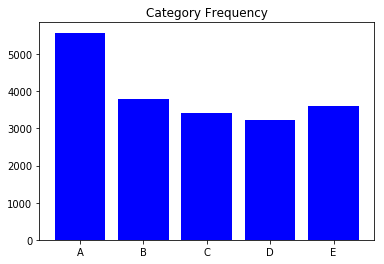

array([['A', 5580],
       ['B', 3797],
       ['C', 3422],
       ['D', 3216],
       ['E', 3607]], dtype=object)

In [36]:
table = itemfreq(Y)
plt.bar(table[:,0],table[:,1],color = 'blue')
plt.title('Category Frequency')
plt.show()
table

In [37]:
Y = LE.fit_transform(Y)

NameError: name 'LE' is not defined

In [ ]:
table = itemfreq(Y)
table